In [2]:
# Import libraries
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

11493376/11490434 [==============================] - 1s 0us/step


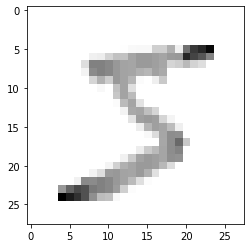

In [3]:
mnist  = tf.keras.datasets.mnist # Handwritten digits 28x28 image data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [4]:
# Training model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                  ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2631 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1055 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0710 - accuracy: 0.9773


In [5]:
# Evaluate model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9722
0.09314623475074768 0.9721999764442444


In [6]:
# Saving Model
model.save('MNIST_class.model')

# Load saved model
new_model = tf.keras.models.load_model('MNIST_class.model')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: MNIST_class.model\assets


7


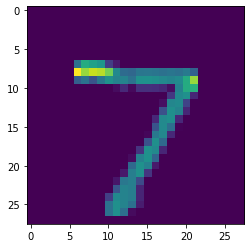

In [7]:
# Using the model
prediction = new_model.predict([x_test])
print(np.argmax(prediction[0])) # Predicts the number of the first image on x_test

plt.imshow(x_test[0])